<a href="https://colab.research.google.com/github/Bayrem-ben/colab.github.io/blob/main/Segmentation_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import cv2
import imutils
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab.patches import cv2_imshow

In [3]:
cha3b = os.path.join('/content/drive/My Drive/','cha3b.pdf')
elhayatalarabiya = os.path.join('/content/drive/My Drive/', 'elhayatalarabiya.pdf')
assabah = os.path.join('/content/drive/My Drive/', 'assabah.pdf')

In [4]:
print(cha3b)

/content/drive/My Drive/cha3b.pdf


In [ ]:
l = []
image = cv2.imread('/content/drive/MyDrive/ImagesFromPDF/0012.jpg')


In [ ]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np

l = []
# The input image.
image = img_as_ubyte(rgb2gray(io.imread("/content/drive/MyDrive/ImagesFromPDF/0012.jpg")))
plt.imshow(image, cmap='gray')
l.append(image)
scale = 0.6 #microns/pixel

#plt.hist(blue_channel.flat, bins=100, range=(0,150))  #.flat returns the flattened numpy array (1D)

from skimage.filters import threshold_otsu
threshold = threshold_otsu(image)

#Generate thresholded image
thresholded_img = image < threshold
l.append(thresholded_img)

#Remove edge touching regions
from skimage.segmentation import clear_border
edge_touching_removed = clear_border(thresholded_img)
l.append(edge_touching_removed)

#Label connected regions of an integer array using measure.label
#Labels each connected entity as one object
#Connectivity = Maximum number of orthogonal hops to consider a pixel/voxel as a neighbor. 
#If None, a full connectivity of input.ndim is used, number of dimensions of the image
#For 2D image it would be 2

label_image = measure.label(edge_touching_removed, connectivity=image.ndim)

l.append(label_image)
#Return an RGB image where color-coded labels are painted over the image.
#Using label2rgb

image_label_overlay = label2rgb(label_image, image=image)
l.append(image_label_overlay)

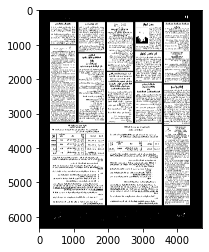

In [47]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

l = []
img = cv2.imread("/content/drive/MyDrive/ImagesFromPDF/0012.jpg")
l.append(img)
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
cells=img[:,:,0]  #Blue channel. Image equivalent to grey image.


pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)

#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

from skimage.segmentation import clear_border
opening = clear_border(opening) #Remove edge touching grains
l.append(opening)
plt.imshow(opening, cmap='gray')

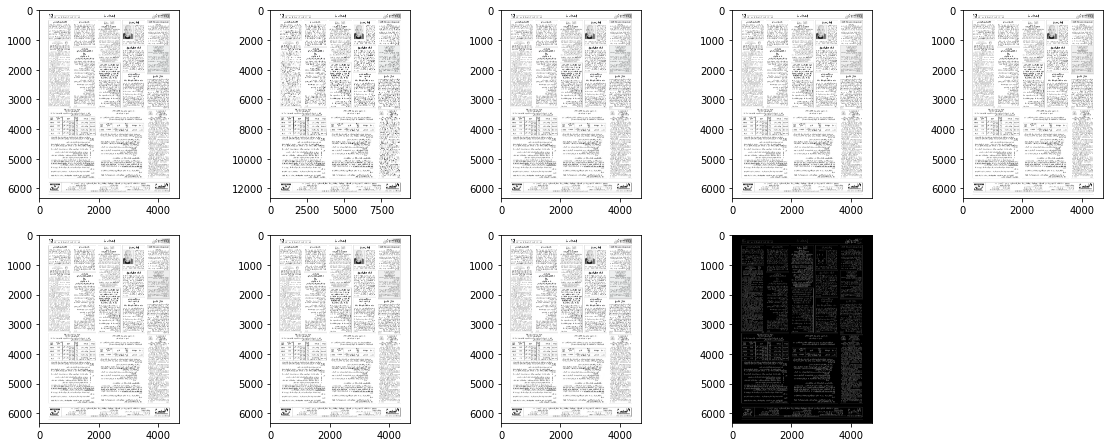

In [41]:
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(5,5,i+1)    # the number of images in the grid
    plt.imshow(l[i], cmap='gray')
plt.show()
#plt.imshow(image)